# Ranking

# 1. Defining the Question

### a) Specifying the Question

> We are to make a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly. 

### b) Defining the Metric for Success

> We will use the root mean square in polynomial regression to measure the performace of the model. The accuracy score and the f1 score will be used in the logistic regression to measure performance.

### c) Understanding the context 

> The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Brazil.[1] The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest.
> A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams.

### d) Recording the Experimental Design

1. Loading the datasets
2. Data Preparation
3. Investigating the dataset
4. Data cleaning
5. Exploratory Data Analysis(Univariate, Bivariate, Multivariate)
6. Modelling
7. Answering the question
8. Conclusion
9. Recommendation
10. Follow up questions

### e) Data Relevance

We will measure the relevance after doing analysis of the dataset.

# 2. Reading the Data

## Importing Libraries

In [1504]:
# Importing libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading datasets

In [1505]:
ranking = pd.read_csv('/home/addam/Downloads/core/ippweek 6/Week 6 IP Datasets/fifa_ranking.csv')

In [1506]:
results = pd.read_csv('/home/addam/Downloads/core/ippweek 6/Week 6 IP Datasets/results.csv')

# 3. Checking the Data

In [1507]:
# top of dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [1508]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [1509]:
# bottom of dataset

ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [1510]:

results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [1511]:
# Determining the no. of records in our ranking dataset
#
ranking.count()

rank                       57793
country_full               57793
country_abrv               57793
total_points               57793
previous_points            57793
rank_change                57793
cur_year_avg               57793
cur_year_avg_weighted      57793
last_year_avg              57793
last_year_avg_weighted     57793
two_year_ago_avg           57793
two_year_ago_weighted      57793
three_year_ago_avg         57793
three_year_ago_weighted    57793
confederation              57793
rank_date                  57793
dtype: int64

In [1512]:
# Determining the no. of records in our results dataset
#
results.count()

date          40839
home_team     40839
away_team     40839
home_score    40839
away_score    40839
tournament    40839
city          40839
country       40839
neutral       40839
dtype: int64

In [1513]:
# Checking whether each column has an appropriate datatype
#
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [1514]:
# information on results dataset
results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


# 4. External Data Source Validation

> According to wikipedia, FIFA announced they were reviewing the ranking system and would decide after the end of the 2018 FIFA World Cup qualification if any changes are to be made to improve the ranking. FIFA announced on 10 June 2018 that the ranking system would be updated following the 2018 World Cup finals. The calculation method to be adopted will be closely modelled after the Elo rating system and rankings of its member associations will be updated on a game-by-game basis. The weighting designated for each confederation for ranking purposes will be abolished. However, the new methodology does not account for home or away games and margin of the victory, as Elo rankings.
> Starting with the April 2021 rankings, the teams' points are now rounded to two decimal points, instead of being rounded to the nearest integer.
> The rankings are used by FIFA to rank the progression and current ability of the national football teams of its member nations, and claims that they create "a reliable measure for comparing national A-teams

# 5. Data Cleaning

In [1515]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

### a. Validation

In [1516]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [1517]:
# joining the two datasets
foota = ranking.join(results, how='left')
foota.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,1993-08-08,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,...,1993-08-08,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,...,1993-08-08,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,...,1993-08-08,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,...,1993-08-08,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [1518]:
#foota = pd.concat([ranking, results], axis=1, join='inner',ignore_index=False)
#foota.head()

In [1519]:
# checking useful variables for modelling

foota.drop(['country_abrv', 'confederation', 'city', 'country', 'rank_date', 'date'], inplace = True, axis=1)
foota.head()

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,neutral
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,0.0,0.0,Friendly,False
1,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,England,Scotland,4.0,2.0,Friendly,False
2,3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,2.0,1.0,Friendly,False
3,4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,England,Scotland,2.0,2.0,Friendly,False
4,5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,3.0,0.0,Friendly,False


In [1520]:
# renaming columns

foota.rename(columns={'country_full': 'country'}, inplace=True)
foota.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,neutral
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,0.0,0.0,Friendly,False
1,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,England,Scotland,4.0,2.0,Friendly,False
2,3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,2.0,1.0,Friendly,False
3,4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,England,Scotland,2.0,2.0,Friendly,False
4,5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,3.0,0.0,Friendly,False


In [1521]:
# make rank index
foota.set_index(['rank'], inplace= True)

In [1522]:
# changing date variable to date time

#foota['date'] = pd.to_datetime(foota['date'])
#foota.head()

In [1523]:
# dealing with white spaces
foota.columns = foota.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
foota.columns

/tmp/ipykernel_7969/3458380821.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  foota.columns = foota.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


Index(['country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'neutral'],
      dtype='object')

## Checking outliers

/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

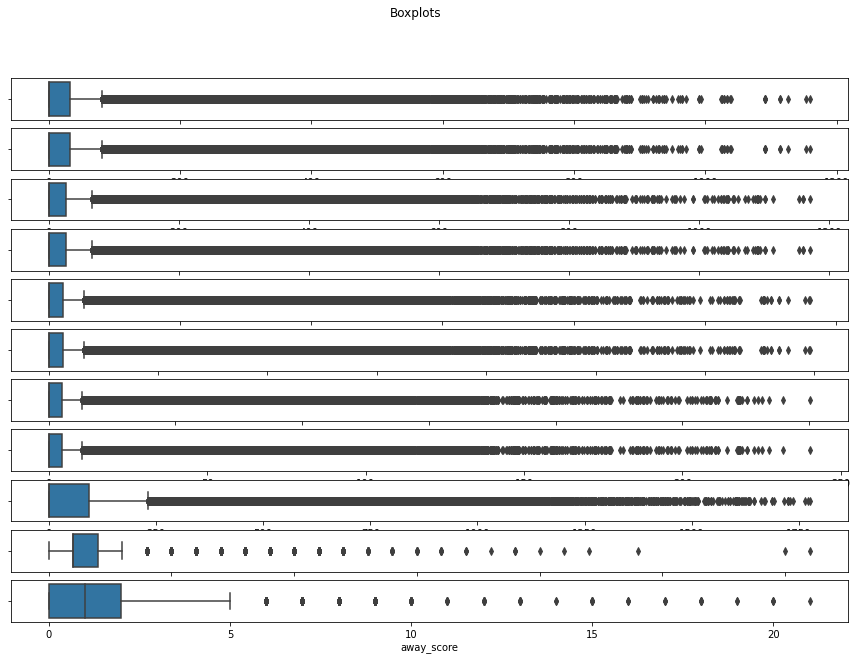

In [1524]:
# Checking for Outliers
#
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(11, figsize=(15, 10))
fig.suptitle('Boxplots')
sns.boxplot(foota['cur_year_avg'], ax=ax1)
sns.boxplot(foota['cur_year_avg_weighted'], ax=ax2)
sns.boxplot(foota['last_year_avg'], ax=ax3)
sns.boxplot(foota['last_year_avg_weighted'], ax=ax4)
sns.boxplot(foota['two_year_ago_avg'], ax=ax5)
sns.boxplot(foota['two_year_ago_weighted'], ax=ax6)
sns.boxplot(foota['three_year_ago_avg'], ax=ax7)
sns.boxplot(foota['three_year_ago_weighted'], ax=ax8)
sns.boxplot(foota['total_points'], ax=ax9)
sns.boxplot(foota['home_score'], ax=ax10)
sns.boxplot(foota['away_score'], ax=ax11)



plt.show()

As we can see from above, there are outliers. However this data is the True value which cannot be changed. 

## checking missing data

In [1525]:
# Identifying the Missing Data
# ranking
foota.isnull().sum().sum()

101724

In [1526]:
# checking shape 
foota.shape

(57793, 18)

In [1527]:
# Dealing with the Missing Data
#
foota.dropna(inplace=True)

In [1528]:
# confirming no missing values

foota.isnull().sum().sum()

0

## checking duplicates

In [1529]:
# checking foota duplicates and dropping
foota.duplicated().sum()
foota.drop_duplicates().head()


,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,neutral
rank,,,,,,,,,,,,,,,,,,
1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,0.0,0.0,Friendly,False
2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,England,Scotland,4.0,2.0,Friendly,False
3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,2.0,1.0,Friendly,False
4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,England,Scotland,2.0,2.0,Friendly,False
5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,3.0,0.0,Friendly,False


## checking anomalies

### using isolation forest

In [1530]:
# rank

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=1000, contamination=float(0.1))
isolation_forest.fit(foota['total_points'].values.reshape(-1, 1))
foota['anomaly_score_rate'] = isolation_forest.decision_function(foota['total_points'].values.reshape(-1, 1))
foota['anomaly'] = isolation_forest.predict(foota['total_points'].values.reshape(-1, 1))
foota.head()

,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,neutral,anomaly_score_rate,anomaly
rank,,,,,,,,,,,,,,,,,,,,
1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,0.0,0.0,Friendly,False,0.0,1
2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,England,Scotland,4.0,2.0,Friendly,False,0.0,1
3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,2.0,1.0,Friendly,False,0.0,1
4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,England,Scotland,2.0,2.0,Friendly,False,0.0,1
5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,3.0,0.0,Friendly,False,0.0,1


In [1531]:
# predicted anomaly
anomaly=foota.loc[foota['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

          country  total_points  previous_points  rank_change  cur_year_avg  \
rank                                                                          
1     Netherlands       1596.13             1542            1        748.05   
2           Spain       1563.45             1588           -1        589.59   
3         Germany       1329.86             1305            0        617.83   
4         England       1176.88             1146            2        588.08   
5         Uruguay       1174.34             1156            0        599.26   
...           ...           ...              ...          ...           ...   
42        IR Iran        625.73              576            8        385.24   
44        Nigeria        624.77              613           -1        256.15   
45          Wales        618.79              374           45        468.33   
46        Armenia        607.91              610           -2        367.81   
47       Cameroon        599.98              596    

In [1532]:
# checking ouliers above the given threshold
outliers_counter = len(foota[foota['total_points'] > 100])
outliers_counter

381

In [1533]:
# accuracy of model

print("Accuracy percentage:", 100*list(foota['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 118.37270341207349


In [1534]:
# checking our data
foota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40839 entries, 1 to 47
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  40839 non-null  object 
 1   total_points             40839 non-null  float64
 2   previous_points          40839 non-null  int64  
 3   rank_change              40839 non-null  int64  
 4   cur_year_avg             40839 non-null  float64
 5   cur_year_avg_weighted    40839 non-null  float64
 6   last_year_avg            40839 non-null  float64
 7   last_year_avg_weighted   40839 non-null  float64
 8   two_year_ago_avg         40839 non-null  float64
 9   two_year_ago_weighted    40839 non-null  float64
 10  three_year_ago_avg       40839 non-null  float64
 11  three_year_ago_weighted  40839 non-null  float64
 12  home_team                40839 non-null  object 
 13  away_team                40839 non-null  object 
 14  home_score               

<AxesSubplot:xlabel='home_score', ylabel='count'>

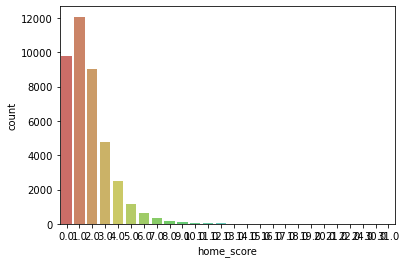

In [1535]:
# Checking that our target variables are binary

sns.countplot(x='home_score',data=foota, palette='hls')

<AxesSubplot:xlabel='away_score', ylabel='count'>

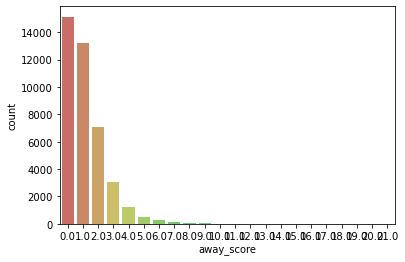

In [1536]:
sns.countplot(x='away_score',data=foota, palette='hls')

From the results above, our two target variables are not binary.

# 6. Exploratory Data Analysis: 

## Univariate analysis

In [1537]:
# Ploting the univariate summaries and recording our observations


foota.describe()

,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score,anomaly_score_rate,anomaly
count,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000
mean,4.940672,302.502069,-0.011141,2.528763,2.528763,2.327918,1.163960,2.458033,0.737413,2.552649,0.510536,1.745709,1.188105,-0.003651,0.977913
std,58.994401,284.765845,5.376577,29.946999,29.946999,32.068579,16.034288,31.247268,9.374193,30.735099,6.147067,1.749145,1.405120,0.036041,0.209014
min,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.423578,-1.000000
25%,0.000000,42.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,506.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000
max,1624.450000,1920.000000,92.000000,748.050000,748.050000,1074.040000,537.020000,1045.510000,313.650000,1045.710000,209.140000,31.000000,21.000000,0.000000,1.000000


In [1538]:
# quantiles

foota.quantile([0.25,0.5,0.75])

,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score,anomaly_score_rate,anomaly
0.25,0.0,42.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
0.50,0.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
0.75,0.0,506.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0


In [1539]:
# skewness
foota.skew()

/tmp/ipykernel_7969/2257806343.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  foota.skew()


total_points               14.844766
previous_points             1.042074
rank_change                 1.300596
cur_year_avg               14.401956
cur_year_avg_weighted      14.401956
last_year_avg              18.175669
last_year_avg_weighted     18.175677
two_year_ago_avg           15.882601
two_year_ago_weighted      15.882537
three_year_ago_avg         15.511403
three_year_ago_weighted    15.511318
home_score                  2.201504
away_score                  2.590589
neutral                     1.162415
anomaly_score_rate        -10.153744
anomaly                    -9.357869
dtype: float64

array([[<AxesSubplot:title={'center':'total_points'}>,
        <AxesSubplot:title={'center':'previous_points'}>,
        <AxesSubplot:title={'center':'rank_change'}>,
        <AxesSubplot:title={'center':'cur_year_avg'}>],
       [<AxesSubplot:title={'center':'cur_year_avg_weighted'}>,
        <AxesSubplot:title={'center':'last_year_avg'}>,
        <AxesSubplot:title={'center':'last_year_avg_weighted'}>,
        <AxesSubplot:title={'center':'two_year_ago_avg'}>],
       [<AxesSubplot:title={'center':'two_year_ago_weighted'}>,
        <AxesSubplot:title={'center':'three_year_ago_avg'}>,
        <AxesSubplot:title={'center':'three_year_ago_weighted'}>,
        <AxesSubplot:title={'center':'home_score'}>],
       [<AxesSubplot:title={'center':'away_score'}>,
        <AxesSubplot:title={'center':'anomaly_score_rate'}>,
        <AxesSubplot:title={'center':'anomaly'}>, <AxesSubplot:>]],
      dtype=object)

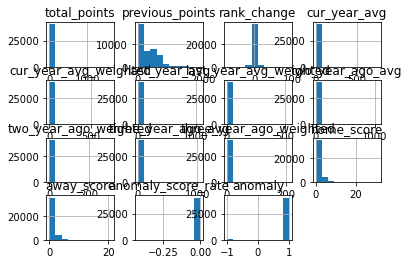

In [1540]:
# histogram for total_points 
foota.hist()

The results above show that all our variables are right skewed.

### categorical

## Bivariate analysis

In [1541]:
# Ploting the bivariate summaries and recording our observations
# ranking
#sns.pairplot(foota)
#plt.show()

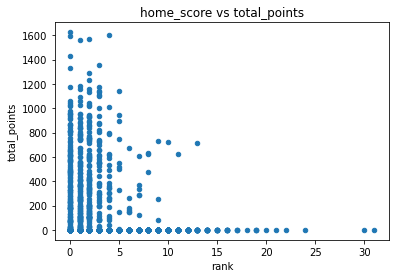

In [1542]:
# Using Pandas: Plotting our scatterplot to compare the variables
foota.plot(x = 'home_score', y = 'total_points', kind='scatter')

# Giving our scatterplot a title
plt.title('home_score vs total_points')

# Labelling our x axis
plt.xlabel('rank')

# Labelling our y axis
plt.ylabel('total_points')

# We then display our scatterplot as shown below
plt.show()

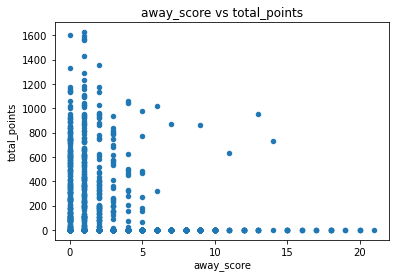

In [1543]:
# away_score
foota.plot(x = 'away_score', y = 'total_points', kind='scatter')
plt.title('away_score vs total_points')
plt.xlabel('away_score')
plt.ylabel('total_points')

plt.show()

according to the above plots, the total points is not directly affected by the scores of either home side or away.

In [1544]:
# general correlation
foota.corr()

,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score,anomaly_score_rate,anomaly
total_points,1.000000,0.117906,0.007165,0.975278,0.975278,0.946109,0.946109,0.945797,0.945798,0.935644,0.935644,0.002231,0.004485,-0.896436,-0.792535
previous_points,0.117906,1.000000,-0.022447,0.110974,0.110974,0.120096,0.120096,0.112495,0.112494,0.106110,0.106109,-0.069557,-0.071836,-0.078066,-0.052145
rank_change,0.007165,-0.022447,1.000000,0.014889,0.014889,-0.004070,-0.004070,0.005181,0.005181,-0.001061,-0.001060,-0.011641,0.007927,-0.005642,-0.003270
cur_year_avg,0.975278,0.110974,0.014889,1.000000,1.000000,0.864685,0.864685,0.886014,0.886016,0.881502,0.881504,0.002100,0.006115,-0.897340,-0.799094
cur_year_avg_weighted,0.975278,0.110974,0.014889,1.000000,1.000000,0.864685,0.864685,0.886014,0.886016,0.881502,0.881504,0.002100,0.006115,-0.897340,-0.799094
last_year_avg,0.946109,0.120096,-0.004070,0.864685,0.864685,1.000000,1.000000,0.897664,0.897665,0.890060,0.890059,0.000377,0.003790,-0.794314,-0.686960
last_year_avg_weighted,0.946109,0.120096,-0.004070,0.864685,0.864685,1.000000,1.000000,0.897664,0.897664,0.890060,0.890059,0.000377,0.003790,-0.794315,-0.686960
two_year_ago_avg,0.945797,0.112495,0.005181,0.886014,0.886014,0.897664,0.897664,1.000000,1.000000,0.894033,0.894034,0.004233,0.000956,-0.845591,-0.744421
two_year_ago_weighted,0.945798,0.112494,0.005181,0.886016,0.886016,0.897665,0.897664,1.000000,1.000000,0.894034,0.894035,0.004233,0.000956,-0.845594,-0.744424
three_year_ago_avg,0.935644,0.106110,-0.001061,0.881502,0.881502,0.890060,0.890060,0.894033,0.894034,1.000000,1.000000,0.003743,0.001913,-0.870175,-0.785959


Looking at our target variables in relation to the total points, they are both above zero showing a positive relationship. Comparing to the rank change, the home score is negatively correlated, however the away score is positively correlated.

<AxesSubplot:>

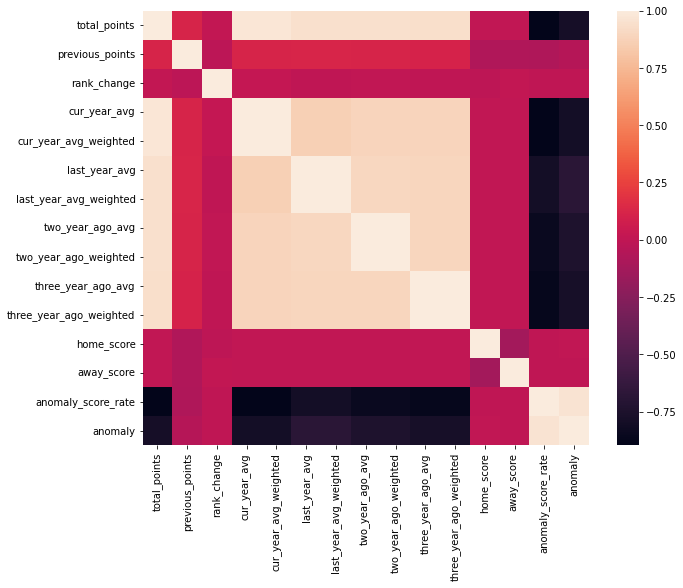

In [1545]:
# heatmap for looking at how the variables interact
columns = ('home_score', 'away_score')
f, ax = plt.subplots(figsize=(10, 8))
corr = foota.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

The heat map above shows that the total points are very closely interacting with the previous points. However our target variables do not closely interact with the total points, previous points or rank change.

In [1546]:
# correlation
# Calculating the pearson coefficient
pc = foota["home_score"].corr(foota["away_score"], method="pearson") 
print(pc)

# Checking whether you have to define the pearson
coeff = foota["home_score"].corr(foota["away_score"]) 
print(coeff)

-0.1334118196387375
-0.1334118196387375


The above results show a negative relationship between the two variables since the correlation coefficient is less than 0. This is an indication that both variables move in the opposite direction. Therefore, if one variable increases, the other variable decreases with the same magnitude (and vice versa).

## 7. Implementing the Solution

### encoding categorical variables

In [1547]:
# Categorical boolean mask
categorical = foota.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = foota.columns[categorical].tolist()

In [1548]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

In [1549]:
# apply le on categorical feature columns
foota[categorical_cols] = foota[categorical_cols].apply(lambda col: le.fit_transform(col))

foota[categorical_cols].head(10)

,country,home_team,away_team,tournament,neutral
rank,,,,,
1,75,238,85,54,0
2,94,85,233,54,0
3,182,238,85,54,0
4,181,85,233,54,0
5,8,238,85,54,0
6,154,238,291,54,0
7,156,85,233,54,0
8,27,295,233,54,0
9,140,238,85,54,0


In [1550]:
# applying a one hot encoder
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(foota[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=foota.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = foota.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)



In [1551]:
foota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40839 entries, 1 to 47
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  40839 non-null  int64  
 1   total_points             40839 non-null  float64
 2   previous_points          40839 non-null  int64  
 3   rank_change              40839 non-null  int64  
 4   cur_year_avg             40839 non-null  float64
 5   cur_year_avg_weighted    40839 non-null  float64
 6   last_year_avg            40839 non-null  float64
 7   last_year_avg_weighted   40839 non-null  float64
 8   two_year_ago_avg         40839 non-null  float64
 9   two_year_ago_weighted    40839 non-null  float64
 10  three_year_ago_avg       40839 non-null  float64
 11  three_year_ago_weighted  40839 non-null  float64
 12  home_team                40839 non-null  int64  
 13  away_team                40839 non-null  int64  
 14  home_score               

### Detecting multicollinearity

In [1552]:
# Remove the target variables columns, let us focus on our independent variables
# dropping anomaly score rate and anomaly columns
foota = foota.drop(columns=['anomaly_score_rate','anomaly'])
independent = foota.drop(columns=['home_score', 'away_score'])

# Let's display the correlations between the variables
correlations = independent.corr()

correlations

,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,tournament,neutral
country,1.000000,-0.000923,0.010420,-0.003967,-0.001201,-0.001201,0.000410,0.000410,-0.002661,-0.002661,-0.000023,-0.000023,0.001231,-0.004398,0.001320,0.001527
total_points,-0.000923,1.000000,0.117906,0.007165,0.975278,0.975278,0.946109,0.946109,0.945797,0.945798,0.935644,0.935644,0.004696,0.009204,0.011210,0.038476
previous_points,0.010420,0.117906,1.000000,-0.022447,0.110974,0.110974,0.120096,0.120096,0.112495,0.112494,0.106110,0.106109,0.006653,-0.019796,-0.012294,0.060493
rank_change,-0.003967,0.007165,-0.022447,1.000000,0.014889,0.014889,-0.004070,-0.004070,0.005181,0.005181,-0.001061,-0.001060,0.000173,-0.000770,-0.001596,0.008335
cur_year_avg,-0.001201,0.975278,0.110974,0.014889,1.000000,1.000000,0.864685,0.864685,0.886014,0.886016,0.881502,0.881504,0.006046,0.008983,0.011501,0.040709
cur_year_avg_weighted,-0.001201,0.975278,0.110974,0.014889,1.000000,1.000000,0.864685,0.864685,0.886014,0.886016,0.881502,0.881504,0.006046,0.008983,0.011501,0.040709
last_year_avg,0.000410,0.946109,0.120096,-0.004070,0.864685,0.864685,1.000000,1.000000,0.897664,0.897665,0.890060,0.890059,0.002902,0.009399,0.007491,0.031725
last_year_avg_weighted,0.000410,0.946109,0.120096,-0.004070,0.864685,0.864685,1.000000,1.000000,0.897664,0.897664,0.890060,0.890059,0.002902,0.009399,0.007491,0.031725
two_year_ago_avg,-0.002661,0.945797,0.112495,0.005181,0.886014,0.886014,0.897664,0.897664,1.000000,1.000000,0.894033,0.894034,0.002404,0.007500,0.011250,0.035285
two_year_ago_weighted,-0.002661,0.945798,0.112494,0.005181,0.886016,0.886016,0.897665,0.897664,1.000000,1.000000,0.894034,0.894035,0.002404,0.007500,0.011250,0.035285


In [1559]:
# Doing an inverse

'''from numpy import linalg as LA

try:
    pd.DataFrame(np.linalg.inv(independent.values), index = independent.index, columns=independent.columns)

except np.linalg.LinAlgError as err:
    if 'Singular matrix' in str(err):
        print('singular')
    else:
        raise LA('%d-dimensional array given. Array must be '
                        'at least two-dimensional' % independent.ndim)

def _assert_stacked_square(*arrays):
    for a in arrays:
            m, n = a.shape[-2:]
            if m != n:
                raise LA('Last 2 dimensions of the array must be square')

def _assert_finite(*arrays):
    for a in arrays:
            if not np.isfinite(a).all():
                raise LA("Array must not contain infs or NaNs")

def _is_empty_2d(arr):
        print(' ')'''

 



'from numpy import linalg as LA\n\ntry:\n    pd.DataFrame(np.linalg.inv(independent.values), index = independent.index, columns=independent.columns)\n\nexcept np.linalg.LinAlgError as err:\n    if \'Singular matrix\' in str(err):\n        print(\'singular\')\n    else:\n        raise LA(\'%d-dimensional array given. Array must be \'\n                        \'at least two-dimensional\' % independent.ndim)\n\ndef _assert_stacked_square(*arrays):\n    for a in arrays:\n            m, n = a.shape[-2:]\n            if m != n:\n                raise LA(\'Last 2 dimensions of the array must be square\')\n\ndef _assert_finite(*arrays):\n    for a in arrays:\n            if not np.isfinite(a).all():\n                raise LA("Array must not contain infs or NaNs")\n\ndef _is_empty_2d(arr):\n        print(\' \')'

### Residual plots and heteroskedasticity testing

In [ ]:
'''import statsmodels.api as sm
from statsmodels.formula.api import ols

# fit multi linear regression model
multi_model = ols('price ~ area + bedrooms', data=foota).fit()
  
# display model summary
print(multi_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(multi_model, 'area', fig=fig)'''

In [1561]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = independent.values
y = foota['home_score'].values

X_train, X_test, score_train, score_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, score_train)

# This is our prediction for score based on our model
score_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(score_predict, score_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.0008783041527643885

In [1563]:
results.max()

date               2019-07-20
home_team       Åland Islands
away_team       Åland Islands
home_score                 31
away_score                 21
tournament    World Unity Cup
city                   ‘Atele
country                  Éire
neutral                  True
dtype: object

We are trying to predict the result of a match, home or away, and if friendly or not.This would mean values between 0 and 31 for home score and 0 to 21 for away score. Our mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 0.08783%

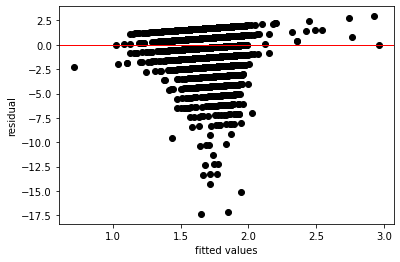

In [1562]:
# plotting scatter plot

plt.scatter(score_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Well a lot of points seem to fall near the mean however some have strayed to far from the mean. Now let's perform a barlett's test to be sure.

### barlett's test

In [1564]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(score_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(score_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


## Multiple Linear Regression

### using logistic approach

In [ ]:
# Converting categorical variables to a dummy indicators

#
venue = pd.get_dummies(foota['neutral'],drop_first=True)
venue.head()

In [ ]:
# Converting categorical variables to a dummy indicators

#
venue = pd.get_dummies(foota['tournament'],drop_first=True)
venue.head()